## Laptop Price Prediction by Regression Models 

# <a name='imports' >Libraries Imports</a>

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from currency_converter import CurrencyConverter # currency_converter from EUR to USD
from sqlalchemy import create_engine
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split # split dataset to train set & test set
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
#from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# <a name='LoadData' >Load Data</a>

In [203]:
df_Final= pd.read_csv('final_laptop.csv', encoding='latin-1')
df_Final.head(2)

,Unnamed: 0,laptop_ID,Company,Product,TypeName,Display,ScreenResolution,CPU,RAM,Memory,Gpu,Operating System,Weight,Price_euros,Price-USD,Unnamed: 0.1,Name,Warranty,Price,rating
0,0,1.0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,mac,1.37kg,1339.69,1513.8497,NaN,NaN,NaN,NaN,NaN
1,1,2.0,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,mac,1.34kg,898.94,1015.8022,NaN,NaN,NaN,NaN,NaN


In [204]:
df_Final.shape

(1853, 20)

In [205]:
df_Final.columns

Index(['Unnamed: 0', 'laptop_ID', 'Company', 'Product', 'TypeName', 'Display',
       'ScreenResolution', 'CPU', 'RAM', 'Memory', 'Gpu', 'Operating System',
       'Weight', 'Price_euros', 'Price-USD', 'Unnamed: 0.1', 'Name',
       'Warranty', 'Price', 'rating'],
      dtype='object')

### Droping colunams 

In [206]:
# Droping colunams
df_Final.drop(labels= ['Unnamed: 0', 'Unnamed: 0.1', 'laptop_ID', 'Price_euros',
                       'Price', 'Name', 'ScreenResolution', 'Gpu', 'rating'], axis=1 , inplace=True)

In [207]:
df_Final.head(2)

,Company,Product,TypeName,Display,CPU,RAM,Memory,Operating System,Weight,Price-USD,Warranty
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8.0,128GB SSD,mac,1.37kg,1513.8497,NaN
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,mac,1.34kg,1015.8022,NaN


In [208]:
df_Final.shape

(1853, 11)

In [209]:
df_Final.columns
#df_Final.head(3)

Index(['Company', 'Product', 'TypeName', 'Display', 'CPU', 'RAM', 'Memory',
       'Operating System', 'Weight', 'Price-USD', 'Warranty'],
      dtype='object')

In [210]:
df_Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1853 entries, 0 to 1852
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1853 non-null   object 
 1   Product           1853 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Display           1853 non-null   float64
 4   CPU               1853 non-null   object 
 5   RAM               1852 non-null   float64
 6   Memory            1853 non-null   object 
 7   Operating System  1853 non-null   object 
 8   Weight            1303 non-null   object 
 9   Price-USD         1853 non-null   float64
 10  Warranty          550 non-null    object 
dtypes: float64(3), object(8)
memory usage: 159.4+ KB


In [211]:
df_Final.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company,1853,29,Lenovo,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product,1853,749,IdeaPad Core,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TypeName,1303,6,Notebook,727,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Display,1853.0,NaN,NaN,NaN,14.925615,1.317484,10.0,14.0,15.598425,15.6,18.4
CPU,1853,157,Intel Core i5 7200U 2.5GHz,190,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RAM,1852.0,NaN,NaN,NaN,8.888769,5.107017,2.0,4.0,8.0,8.0,64.0
Memory,1853,52,256GB SSD,412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Operating System,1853,12,win10,1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weight,1303,179,2.2kg,121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price-USD,1853.0,NaN,NaN,NaN,1206.831666,741.619191,196.62,662.3947,1015.87,1524.37,6891.87


<Figure size 1080x288 with 0 Axes>

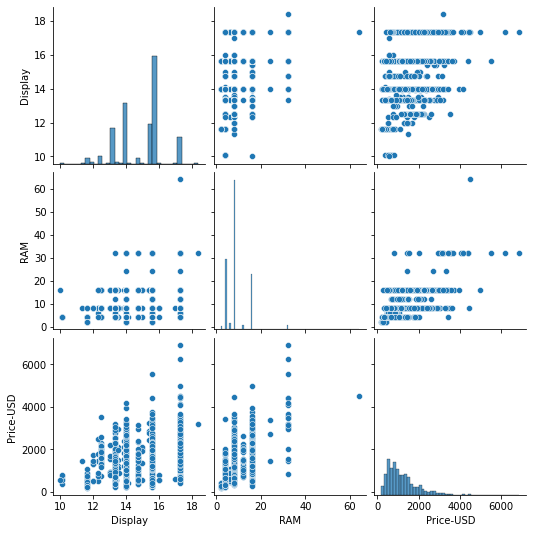

In [212]:
plt.figure(figsize=(15,4))
sns.pairplot(df_Final);

### Missing values: Check for missing data (NAN Value)

In [213]:
# How much of our data is missing?
df_Final.isnull().sum().sort_values(ascending=False) 
#this to check how many missing values in the features of type object only

Warranty            1303
TypeName             550
Weight               550
RAM                    1
Company                0
Product                0
Display                0
CPU                    0
Memory                 0
Operating System       0
Price-USD              0
dtype: int64

In [214]:
#===== Warranty =====
# Check for missing values
df_Final.Warranty.isna()

0        True
1        True
2        True
3        True
4        True
        ...  
1848    False
1849    False
1850    False
1851    False
1852    False
Name: Warranty, Length: 1853, dtype: bool

In [215]:
# df_Final.Warranty.unique()
# Warranty period as month
def warr_month(x):
    x = str(x).lower()
    time = 0
    if "ne-year" in x:
        time = 12
    elif "year" in x:
        time = int(x.split(' ')[0])*12
    elif "month" in x:
        time = int(x.split(' ')[0])
    return time
df_Final.Warranty = df_Final.Warranty.apply(warr_month)
# Convert Warranty to a number
df_Final.Warranty = df_Final.Warranty.astype('float')
#df_Final.head()
# Replace missing values with actual values (mean). Imputing Missings with mean
mean = df_Final.Warranty.mean()
#df_Final.Warranty.value_counts()
# The missing value in Warranty column appears as “0.0”. Replace the values "0.0" with mean.
df_Final = df_Final.replace('0.0', np.nan)
warr_isna = sum(df_Final.Warranty.isna())
print(warr_isna)

0


In [216]:
df_Final[['Warranty']]=df_Final[['Warranty']].replace(0.0,mean)

In [217]:
#======== CPU ========
#df_Final["CPU"].astype('str').astype('float')
df_Final["CPUSpeed"] = df_Final["CPU"].apply(lambda s: s.split()[-1]).apply(lambda s: s.split("G")[0])
#df_Final["CPUSpeed(GHz)"].astype("int")

#======== RAM ========
df_Final["RAM"] = pd.to_numeric(df_Final["RAM"])
#df_Final.RAM.isna()
ram_unique = df_Final.RAM.unique()
print(ram_unique)

[ 8. 16.  4.  2. 12.  6. 32. 24. 64. nan]


In [218]:
# Imputing Missings with 0. Replace the values "nan" with 0.
df_Final["RAM"] = df_Final.RAM.fillna(0)
ram_unique = df_Final.RAM.unique()
print(ram_unique)

[ 8. 16.  4.  2. 12.  6. 32. 24. 64.  0.]


In [219]:
#====== Weight ======
df_Final["Weight"] = df_Final["Weight"].str.replace("kg", "")

In [220]:
df_Final["Weight"] = pd.to_numeric(df_Final["Weight"])

In [221]:
# Imputing Missings with mean
mean = df_Final.Weight.mean()
#df_Final[['Weight']]=df_Final[['Weight']].replace('nan',mean)
df_Final["Weight"] = df_Final["Weight"].fillna(mean)

In [222]:
df_Final.Weight.unique()

array([1.37      , 1.34      , 1.86      , 1.83      , 2.1       ,
       2.04      , 1.3       , 1.6       , 2.2       , 0.92      ,
       1.22      , 0.98      , 2.5       , 1.62      , 1.91      ,
       2.3       , 1.35      , 1.88      , 1.89      , 1.65      ,
       2.71      , 1.2       , 1.44      , 2.8       , 2.        ,
       2.65      , 2.77      , 3.2       , 0.69      , 1.49      ,
       2.4       , 2.13      , 2.43      , 1.7       , 1.4       ,
       1.8       , 1.9       , 3.        , 1.252     , 2.7       ,
       2.02      , 1.63      , 1.96      , 1.21      , 2.45      ,
       1.25      , 1.5       , 2.62      , 1.38      , 1.58      ,
       1.85      , 1.23      , 1.26      , 2.16      , 2.36      ,
       2.05      , 1.32      , 1.75      , 0.97      , 2.9       ,
       2.56      , 1.48      , 1.74      , 1.1       , 1.56      ,
       2.03      , 1.05      , 4.4       , 1.29      , 1.95      ,
       2.06      , 1.12      , 1.42      , 3.49      , 3.35   

In [223]:
df_Final.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1853 entries, 0 to 1852
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1853 non-null   object 
 1   Product           1853 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Display           1853 non-null   float64
 4   CPU               1853 non-null   object 
 5   RAM               1853 non-null   float64
 6   Memory            1853 non-null   object 
 7   Operating System  1853 non-null   object 
 8   Weight            1853 non-null   float64
 9   Price-USD         1853 non-null   float64
 10  Warranty          1853 non-null   float64
 11  CPUSpeed          1853 non-null   object 
dtypes: float64(5), object(7)
memory usage: 173.8+ KB


In [224]:
df_Final.head()

,Company,Product,TypeName,Display,CPU,RAM,Memory,Operating System,Weight,Price-USD,Warranty,CPUSpeed
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8.0,128GB SSD,mac,1.37,1513.8497,4.235294,2.3
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,mac,1.34,1015.8022,4.235294,1.8
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,No OS,1.86,649.7500,4.235294,2.5
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16.0,512GB SSD,mac,1.83,2867.3185,4.235294,2.7
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8.0,256GB SSD,mac,1.37,2038.0680,4.235294,3.1


### Check for Duplicates or unnecessary data 

In [225]:
# The number of duplicates 
df_Final.duplicated(subset=None, keep='first').sum()

36

In [226]:
df_Final.drop_duplicates()
# the number of non-duplicates 
(~df_Final.duplicated()).sum()

1817

### Outliers 

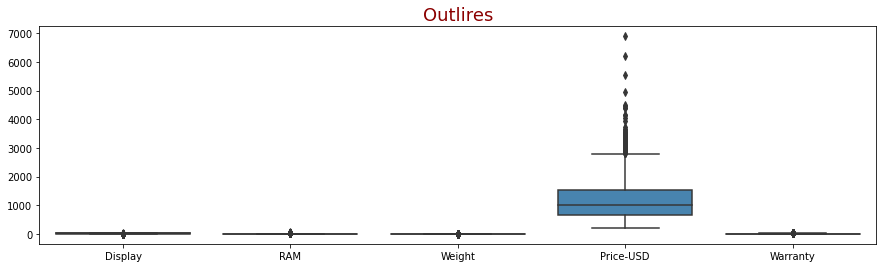

In [227]:
#import seaborn as sns
# Using Boxplots to visualize numeric data for check from Outlires value. 
plt.figure(figsize=(15,4))
sns.boxplot(data=df_Final[['Company', 'Product', 'TypeName', 'Display', 'CPU', 'RAM', 'Memory',
       'Operating System', 'Weight', 'Price-USD', 'Warranty']], palette="Blues")
plt.title('Outlires', color="darkred", fontsize= 18)
plt.show()


### EDA

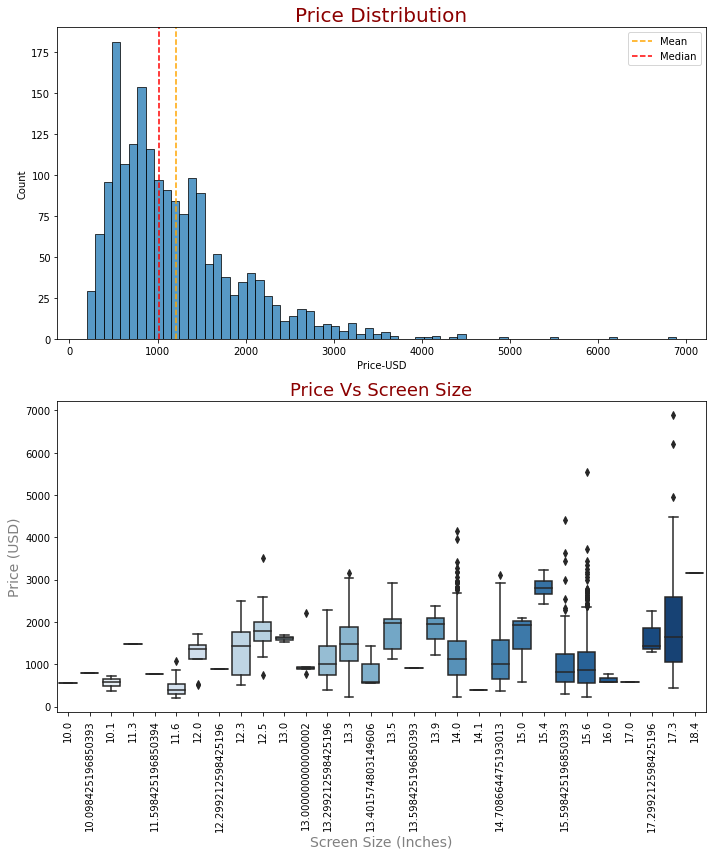

In [228]:
fig = plt.figure(figsize=(10,12))
ax0 = fig.add_subplot(2,1,1)
sns.histplot(x = "Price-USD", data=df_Final, bins=70, ax=ax0)
ax0.set_title("Price Distribution", fontdict={"color":"darkred","fontsize":20})
ax0.axvline(x = df_Final["Price-USD"].mean(), ls="--", color="orange", label="Mean")
ax0.axvline(x = df_Final["Price-USD"].median(), ls="--", color="red", label="Median")
ax0.legend();

label_dict = {"color":"grey","fontsize":14}
title_dict = {"color":"darkred","fontsize":18}

ax0 = fig.add_subplot(2,1,2);
ax0.set_title("Price Vs Screen Size",fontdict=title_dict)
plt.xticks(rotation=90)
sns.boxplot(x="Display",y="Price-USD", data=df_Final,ax=ax0,palette="Blues")
ax0.set_ylabel("Price (USD)",fontdict=label_dict)
ax0.set_xlabel("Screen Size (Inches)",fontdict=label_dict)

plt.tight_layout()

### Label Encoder 

In [229]:
df_Final.columns

Index(['Company', 'Product', 'TypeName', 'Display', 'CPU', 'RAM', 'Memory',
       'Operating System', 'Weight', 'Price-USD', 'Warranty', 'CPUSpeed'],
      dtype='object')

In [230]:
lr=LabelEncoder()

In [231]:
df_Final['Company']=lr.fit_transform(df_Final['Company'])
df_Final['Product']=lr.fit_transform(df_Final['Product'])
df_Final['TypeName']= df_Final['TypeName'].astype(str) 
df_Final['TypeName']=lr.fit_transform(df_Final['TypeName'])
df_Final['Display']=lr.fit_transform(df_Final['Display'])
df_Final['CPU']=lr.fit_transform(df_Final['CPU'])
df_Final['RAM']=lr.fit_transform(df_Final['RAM'])
df_Final['Memory']=lr.fit_transform(df_Final['Memory'])
df_Final['Operating System']=lr.fit_transform(df_Final['Operating System'])
#df_Final['Price-USD']=lr.fit_transform(df_Final['Price-USD'])
df_Final['Warranty']=lr.fit_transform(df_Final['Warranty'])
df_Final['Weight']=lr.fit_transform(df_Final['Weight'])

In [232]:
df_Final.head()

,Company,Product,TypeName,Display,CPU,RAM,Memory,Operating System,Weight,Price-USD,Warranty,CPUSpeed
0,4,370,4,13,87,4,12,8,37,1513.8497,0,2.3
1,4,371,4,13,85,4,10,8,34,1015.8022,0,1.8
2,12,60,3,24,96,4,25,5,72,649.7500,0,2.5
3,4,370,4,22,112,6,41,8,69,2867.3185,0,2.7
4,4,370,4,13,89,4,25,8,37,2038.0680,0,3.1


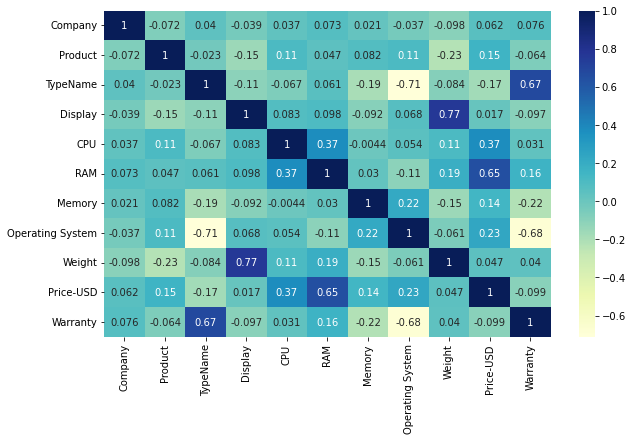

In [233]:
plt.figure(figsize=(10,6))
corr=df_Final.corr()
sns.heatmap(corr,annot=True,cmap= "YlGnBu"); # "BuGn"

### Training and Testing 

In [234]:
df_Final.drop("CPUSpeed", axis = 1, inplace = True)

In [235]:
#df_Final.isna().sum()

In [236]:
x = df_Final.drop(['Price-USD'], axis=1) 
y = df_Final['Price-USD']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1482, 10), (371, 10), (1482,), (371,))

In [237]:
x.head(1)

,Company,Product,TypeName,Display,CPU,RAM,Memory,Operating System,Weight,Warranty
0,4,370,4,13,87,4,12,8,37,0


### Random Forest Regressor 

#### Train model

In [238]:
rfr_model =RandomForestRegressor(n_estimators=100, random_state=0)
rfr_model.fit(x,y)
print("training set = ", rfr_model.score(x_train,y_train))
print("Testing set = ", rfr_model.score(x_test,y_test))

training set =  0.9700296214581652
Testing set =  0.9659313685091241


#### Model evalulation on testing data

In [239]:
rfr_predict = rfr_model.predict(x_test)
rfr_MAE = mean_absolute_error(y_test, rfr_predict) 
rfr_MSE = mean_squared_error(y_test, rfr_predict) 
rfr_RMSE = np.sqrt(rfr_MSE) #rfr_rmse
rfr_accuracy= r2_score(y_test, rfr_predict)
print('Random Forest MAE: ', rfr_MAE)
print('Random Forest MSE: ', rfr_MSE)
print('Random Forest RMSE: ', rfr_RMSE)
print("Random Forest R2: ",rfr_accuracy)

Random Forest MAE:  83.8749663841442
Random Forest MSE:  19389.168148911886
Random Forest RMSE:  139.24499326335538
Random Forest R2:  0.9659313685091241


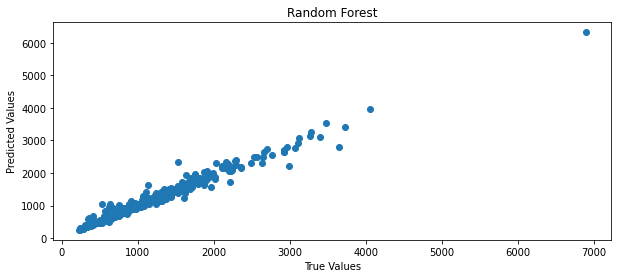

In [240]:
plt.figure(figsize=(10,4))
plt.title('Random Forest')
plt.scatter(y_test, rfr_predict)
plt.xlabel("True Values")
plt.ylabel("Predicted Values");

In [241]:
rfr_model = RandomForestRegressor()
rfr_model.fit(x_train,y_train)
fi = pd.DataFrame(rfr_model.feature_importances_, index= x.columns)
fi.columns=["Feature Importance"]
fi.sort_values(by="Feature Importance", ascending=False).head()


,Feature Importance
RAM,0.459986
Weight,0.118541
Product,0.112920
CPU,0.088912
Operating System,0.058137


### scaler 

In [242]:
#Standardize our values
scaler = StandardScaler()
scaler.fit(x_train.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [243]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### Linear Regression

#### Train model 

In [244]:
linRegr_model = LinearRegression()
linRegr_model.fit(x_train,y_train)
print(linRegr_model.score(x_train,y_train))
print(linRegr_model.score(x_test,y_test))

0.5451650440836313
0.5011143126539633


In [245]:
predict = linRegr_model.predict(x_test)
#predict

#### Model evalulation on testing data 

In [246]:
# mean_absolute_error
linRegr_MAE = mean_absolute_error(y_test, predict)
# mean_squared_error
linRegr_MSE = mean_squared_error(y_test, predict)
# Root mean squared error
linRegr_RMSE = np.sqrt(linRegr_MSE)
# r2_score
linRegr_accuracy = r2_score(y_test, predict)
print('Linear Regression MAE: ',linRegr_MAE)#
print('Linear Regression MSE: ',linRegr_MSE)#
print('Linear Regression RMSE: ',linRegr_RMSE)#
print("Linear Regression R2: ", linRegr_accuracy)

Linear Regression MAE:  361.97386913772266
Linear Regression MSE:  283926.2411121018
Linear Regression RMSE:  532.8472962417111
Linear Regression R2:  0.5011143126539633


Text(0, 0.5, 'Predicted Values')

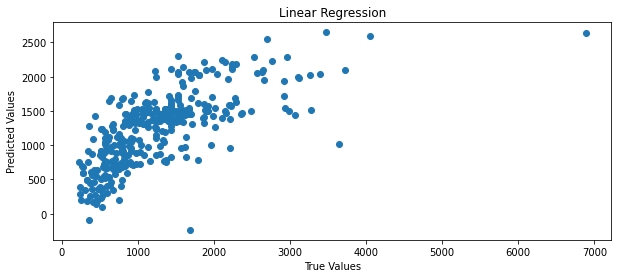

In [247]:
plt.figure(figsize=(10,4))
plt.scatter(y_test,predict)
plt.title('Linear Regression')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

In [248]:
#cdf_lr=pd.DataFrame(linRegr_model.coef_,x.columns,columns=['Coeff'])
#cdf_lr

In [249]:
#df_Final.columns

In [250]:
#df_Final = pd.concat([df_Final.drop('Display', axis=1), pd.get_dummies(df_Final['Display'], drop_first=True)], axis=1)

In [251]:
#df_Final.head()

### LASSO 

In [252]:
lasso_model = Lasso(alpha = 100)
lasso_model.fit(x_train, y_train)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [253]:
list(zip(df_Final.columns, lasso_model.coef_))

[('Company', 0.0),
 ('Product', 0.0),
 ('TypeName', -0.0),
 ('Display', -0.0),
 ('CPU', 24.993151193024023),
 ('RAM', 386.98535058399153),
 ('Memory', 0.0),
 ('Operating System', 104.88957769092654),
 ('Weight', -0.0),
 ('Price-USD', -0.0)]

In [254]:
lasso_model.score(x_train, y_train)

0.48493056150387936

In [255]:
lasso_model.score(x_test, y_test)

0.4375908674182623

### Ridge

In [256]:
lr_model_ridge = Ridge(alpha =  1000000000000)
lr_model_ridge.fit(x_train, y_train)

Ridge(alpha=1000000000000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [257]:
list(zip(df_Final.columns, lr_model_ridge.coef_))

[('Company', 5.4951091889630366e-08),
 ('Product', 1.6989992547036057e-07),
 ('TypeName', -1.912636791852936e-07),
 ('Display', 6.52243412816525e-09),
 ('CPU', 4.196823840114844e-07),
 ('RAM', 7.200448669778845e-07),
 ('Memory', 1.62852898581856e-07),
 ('Operating System', 2.450591678355714e-07),
 ('Weight', 3.5479234574410865e-08),
 ('Price-USD', -1.1128871864537723e-07)]

### Tuning Alpha in Ridge and Lasso 

In [258]:
from sklearn.model_selection import GridSearchCV

In [259]:
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}

In [260]:
lasso_grid = GridSearchCV(Lasso(), param_grid=lasso_params).fit(x_train, y_train)

In [261]:
lasso_grid.best_estimator_

Lasso(alpha=0.03, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [262]:
lasso_grid.best_score_

0.535891256303848

In [263]:
ridge_grid = GridSearchCV(Ridge(), param_grid=ridge_params).fit(x_train, y_train)

In [264]:
ridge_grid.best_estimator_

Ridge(alpha=200, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [265]:
ridge_grid.best_score_

0.5275530228265073

## Feature Engineering
### Exploration 1:

In [266]:
X = df_Final.loc[:,['Company', 'Display', 'RAM', 'Memory']]
y = df_Final['Price-USD']

In [267]:
# linRegr_model
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    linRegr_model = LinearRegression()
    linRegr_model.fit(X_train, y_train)
    train_score = linRegr_model.score(X_train, y_train)
    # score fit model on validation data
    val_score = linRegr_model.score(X_val, y_val)
    
    # report results
    print('\nTrain R^2 score was:', train_score)
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, linRegr_model.coef_):
        print(feature, ':', f'{coef:.2f}')

In [268]:
split_and_validate(X, y)


Train R^2 score was: 0.4486394461719989

Validation R^2 score was: 0.384749050284939
Feature coefficient results: 

Company : 1.57
Display : -5.87
RAM : 331.85
Memory : 6.63


### Exploration 2:  Polynomial Feature 

In [269]:
X2 = x.copy()
X2['OQ2'] = X2['RAM'] ** 2
X2['GLA2'] = X2['CPU'] ** 2
split_and_validate(X2, y)


Train R^2 score was: 0.5687885440453

Validation R^2 score was: 0.5352183642512607
Feature coefficient results: 

Company : 2.80
Product : 0.24
TypeName : 7.06
Display : -6.15
CPU : 3.26
RAM : -28.07
Memory : 1.23
Operating System : 54.10
Weight : -0.93
Warranty : -19.30
OQ2 : 42.79
GLA2 : 0.00


### Exploration 3: adding interaction terms 

In [270]:
x3 = X2.copy() #X3== x2, X2== x

# multiplicative interaction
x3['OQ_x_YB'] = x3['Product'] * x3['TypeName']

# division interaction
#x3['OQ_/_LA'] = x3['Product'] / x3['CPU']

split_and_validate(x3, y)



Train R^2 score was: 0.5713394630656685

Validation R^2 score was: 0.5371390438619619
Feature coefficient results: 

Company : 3.63
Product : -0.13
TypeName : -36.60
Display : -5.73
CPU : 3.47
RAM : -28.03
Memory : 1.20
Operating System : 52.25
Weight : -1.21
Warranty : -11.21
OQ2 : 42.54
GLA2 : -0.00
OQ_x_YB : 0.10


### Comparison of the performance of the models 

In [271]:
models = {"Linear Model":LinearRegression(),
         "Random Forest Regressor":RandomForestRegressor()}

for key,value in models.items():
    value.fit(x_train,y_train)
    print(key," Trained")

Linear Model  Trained
Random Forest Regressor  Trained


Linear Model  score: 0.5011143126539633
Random Forest Regressor  score: 0.72965354856298


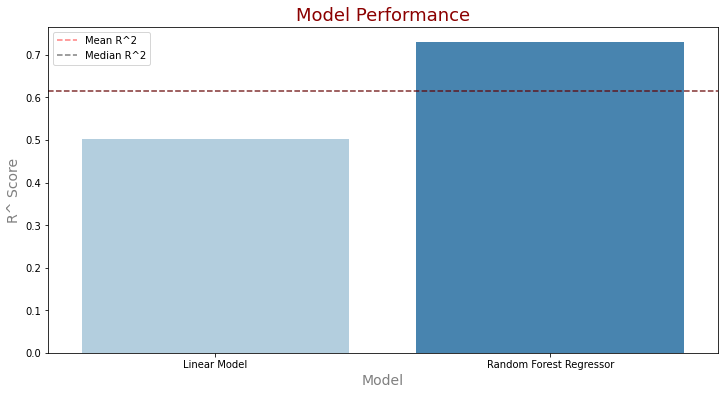

In [272]:
mod=[]
scores=[]
for key,value in models.items():
    score = value.score(x_test,y_test)
    print(key, " score: {}".format(score))
    mod.append(key)
    scores.append(score)
    
plt.figure(figsize=(12,6))
sns.barplot(x=mod,y=scores,palette="Blues")
plt.title("Model Performance",fontdict=title_dict)
plt.ylabel("R^ Score",fontdict=label_dict)
plt.xlabel("Model",fontdict=label_dict)
plt.axhline(np.mean(scores),ls="--",color="red",label="Mean R^2",alpha=0.5)
plt.axhline(np.median(scores),ls="--",color="black",label="Median R^2",alpha=0.5)
plt.legend();